In [5]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn import preprocessing
from scipy.stats import multivariate_normal
from sklearn import cluster, datasets, mixture
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.datasets import make_spd_matrix
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Qn 1

In [15]:
brunhild = pd.read_csv('brunhild.txt', sep='\t')
brunhild

,Hours,Sulfate
0,2,15.11
1,4,11.36
2,6,9.77
3,8,9.09
4,10,8.48
5,15,7.69
6,20,7.33
7,25,7.06
8,30,6.70
9,40,6.43


In [7]:

X = np.log(brunhild['Sulfate'])
y = np.log(brunhild['Hours'])



In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X.values.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

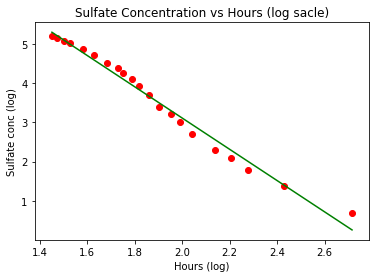

In [9]:
plt.scatter(X, y, color = "red")
plt.plot(X, lr.predict(X.values.reshape(-1,1)), color = "green")
plt.title("Sulfate Concentration vs Hours (log sacle)")
plt.xlabel("Hours (log)")
plt.ylabel("Sulfate conc (log)")
plt.show()

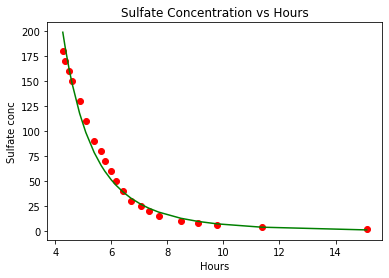

In [10]:
plt.scatter(brunhild['Sulfate'], brunhild['Hours'], color = "red")
plt.plot(brunhild['Sulfate'], np.exp(lr.predict(X.values.reshape(-1,1))), color = "green")
plt.title("Sulfate Concentration vs Hours")
plt.xlabel("Hours")
plt.ylabel("Sulfate conc")
plt.show()

Text(0, 0.5, 'Residual')

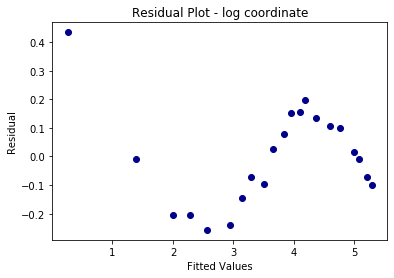

In [11]:
y_predicted = lr.predict(X.values.reshape(-1,1))
residuals = y-y_predicted
plt.plot(y_predicted,residuals, 'o', color='darkblue')
plt.title("Residual Plot - log coordinate")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")

Text(0, 0.5, 'Residual')

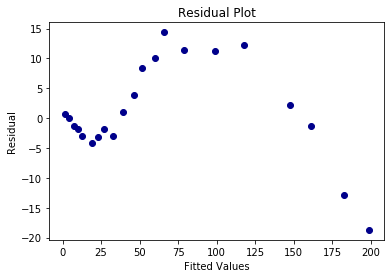

In [12]:
y_predicted = lr.predict(X.values.reshape(-1,1))
residuals = np.exp(y)-np.exp(y_predicted)
plt.plot(np.exp(y_predicted),residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")

# Qn 2

In [89]:
physical = pd.read_csv('physical.txt', sep='\t')
physical

,Mass,Fore,Bicep,Chest,Neck,Shoulder,Waist,Height,Calf,Thigh,Head
0,77.0,28.5,33.5,100.0,38.5,114.0,85.0,178.0,37.5,53.0,58.0
1,85.5,29.5,36.5,107.0,39.0,119.0,90.5,187.0,40.0,52.0,59.0
2,63.0,25.0,31.0,94.0,36.5,102.0,80.5,175.0,33.0,49.0,57.0
3,80.5,28.5,34.0,104.0,39.0,114.0,91.5,183.0,38.0,50.0,60.0
4,79.5,28.5,36.5,107.0,39.0,114.0,92.0,174.0,40.0,53.0,59.0
5,94.0,30.5,38.0,112.0,39.0,121.0,101.0,180.0,39.5,57.5,59.0
6,66.0,26.5,29.0,93.0,35.0,105.0,76.0,177.5,38.5,50.0,58.5
7,69.0,27.0,31.0,95.0,37.0,108.0,84.0,182.5,36.0,49.0,60.0
8,65.0,26.5,29.0,93.0,35.0,112.0,74.0,178.5,34.0,47.0,55.5
9,58.0,26.5,31.0,96.0,35.0,103.0,76.0,168.5,35.0,46.0,58.0


In [90]:
mass = physical["Mass"]
features = physical.drop(["Mass"], axis=1)

In [91]:
mlr = LinearRegression()
mlr.fit(features, mass)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Residual')

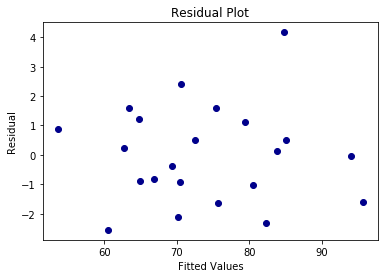

In [92]:
mass_predicted = mlr.predict(features)
residual = mass - mass_predicted
plt.plot(mass_predicted, residual, 'o', color='darkblue')
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residual')

In [93]:
cube_mass = physical
cube_mass['Mass']=np.power((cube_mass['Mass']),1/3)

In [94]:
mlr.fit(features, cube_mass)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Residual')

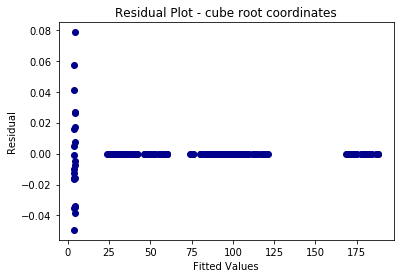

In [100]:
mass_predicted = mlr.predict(features)
residual = cube_mass - mass_predicted
plt.plot(mass_predicted, residual, 'o', color='darkblue')
plt.title('Residual Plot - cube root coordinates')
plt.xlabel('Fitted Values')
plt.ylabel('Residual')

Text(0, 0.5, 'Residual')

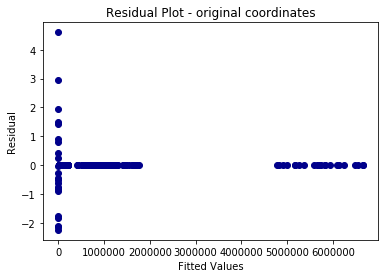

In [101]:
mass_predicted = mlr.predict(features)
residual = np.power(cube_mass,3) - np.power(mass_predicted, 3)
plt.plot(np.power(mass_predicted,3), residual, 'o', color='darkblue')
plt.title('Residual Plot - original coordinates')
plt.xlabel('Fitted Values')
plt.ylabel('Residual')